Chris Sunny Thaliyath

2023pai9051

chrissunny94@gmail.com

![](questions.png)

![](calibration-cameramodel-coords.png)
![](diagram.jpg)

Questions 


Intrinsics

    This deals with the internal parameters of the camera
    The intrinsic matrix, also known as the camera matrix, is a 3x3 matrix that contains the parameters of a camera's internal characteristics. It defines the relationship between the 3D world coordinates and the 2D image coordinates. The intrinsic matrix includes the focal length of the camera, the image sensor's pixel size, the principal point (the optical center of the lens), and other camera calibration parameters. The intrinsic matrix is typically computed during the camera calibration process and is used to correct the distortion in the images captured by the camera.





- Intrinsic parameters are properties of the camera itself, such as focal length, principal point, and lens distortion. These parameters are fixed for a particular camera and do not change with the camera's position or orientation in the scene.

- Extrinsic parameters define the camera's location and orientation in the world coordinate system. These parameters change depending on where the camera is positioned and how it's rotated.

Extrinsics 

        This mainly has to do with the external placement of the sensors .

        Usually extrinsic is represented as .
        
        - (X, Y , Z) -pose , (RX, RY,RZ,RW)- quaternion



The number of images required for calibration can vary depending on the complexity of the camera model and the desired accuracy. 

***A minimum of six(6) non-coplanar points is typically needed to solve for the intrinsic parameters.***

Once the camera is calibrated, the **intrinsic and extrinsic** parameters can be used for various tasks in computer vision, such as:

- 3D reconstruction: 
- Augmented reality: 
- Object tracking: 

In [2]:
import cv2

from cv2 import cvtColor , COLOR_BGR2RGB , TERM_CRITERIA_MAX_ITER , KMEANS_RANDOM_CENTERS ,TERM_CRITERIA_EPS ,kmeans
import numpy as np
from matplotlib import pyplot as plt
from numpy import unique , float32 , uint8

#from enum import unique
#Read an RGB image as input.(DONE)

def read_image(path_to_image):
    image=cv2.imread(path_to_image)
    return image

def display_image(title,image):
    #cv2.imshow("input_image",image)
    plt.imshow(image)
    plt.title(title)
    plt.show()



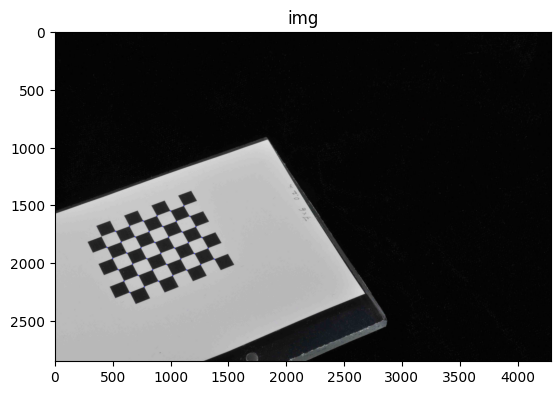

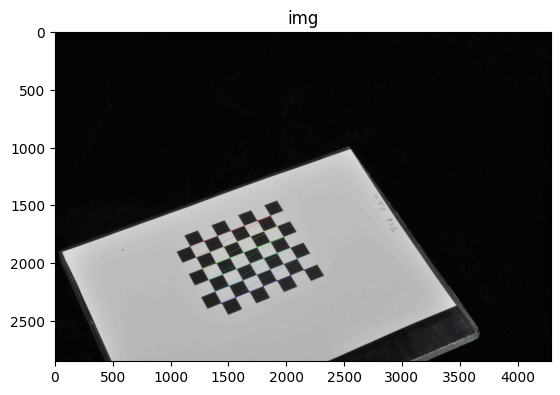

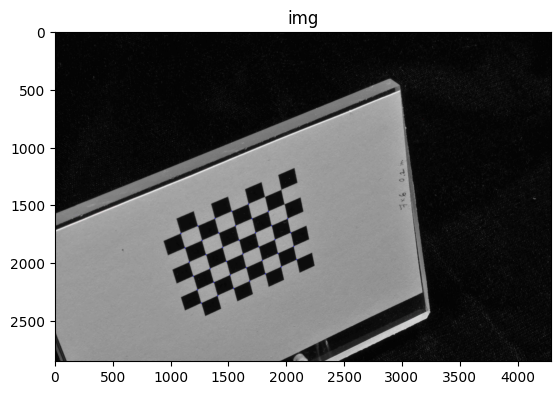

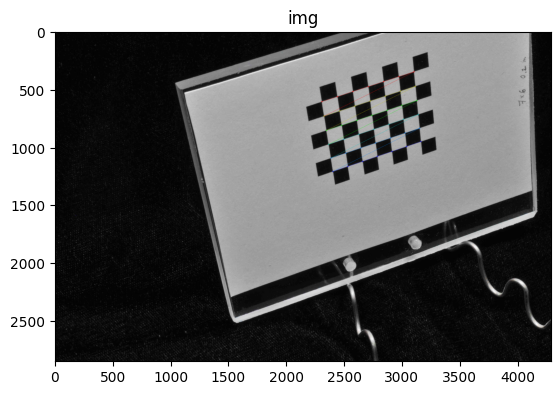

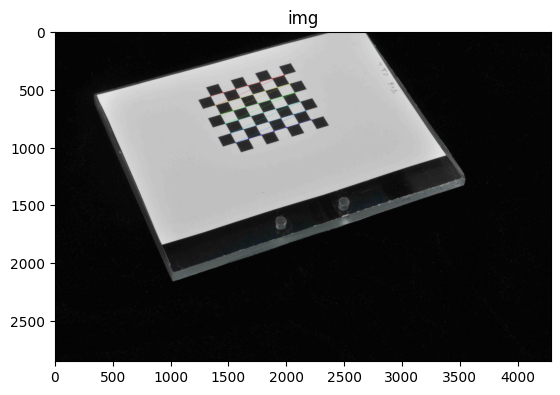

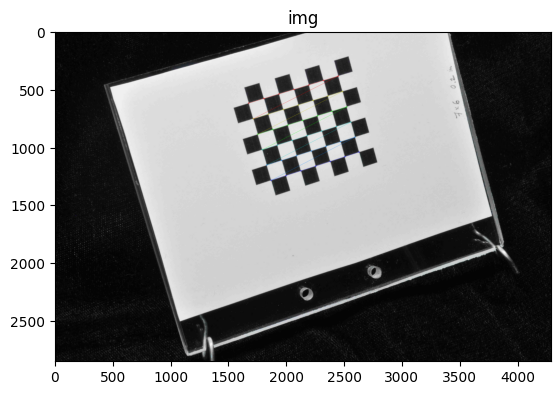

In [3]:
import numpy as np
import cv2 as cv
import glob
 
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
 
images = glob.glob('Test_calibration_set/Images/Left/*.jpeg')
 
for fname in images:
 img = cv.imread(fname)
 gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
 # Find the chess board corners
 ret, corners = cv.findChessboardCorners(gray, (7,6), None)
 
 # If found, add object points, image points (after refining them)
 if ret == True:
    objpoints.append(objp)
 
 corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
 imgpoints.append(corners2)
 
 # Draw and display the corners
 cv.drawChessboardCorners(img, (7,6), corners2, ret)
 display_image('img', img)
 cv.waitKey(500)
 
cv.destroyAllWindows()

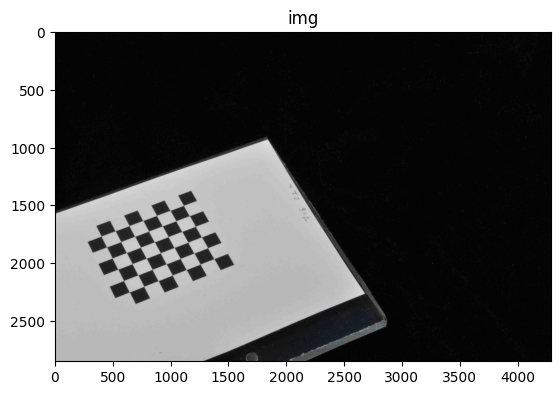

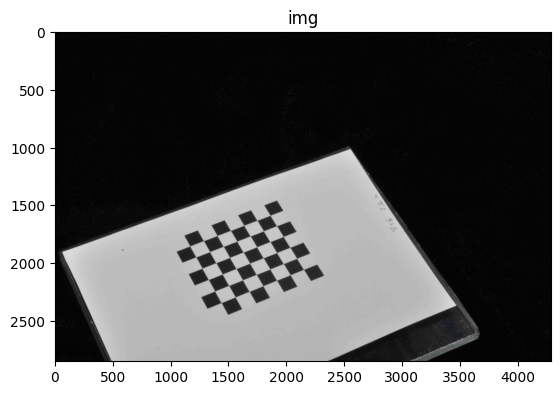

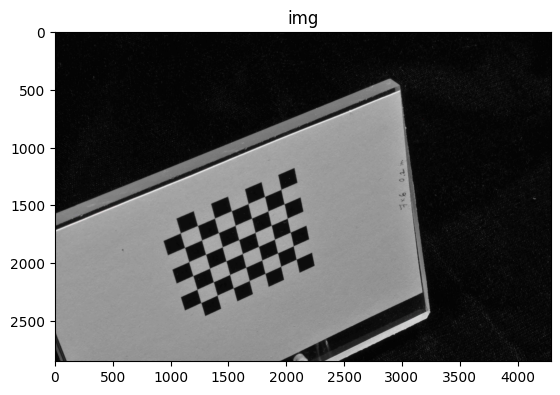

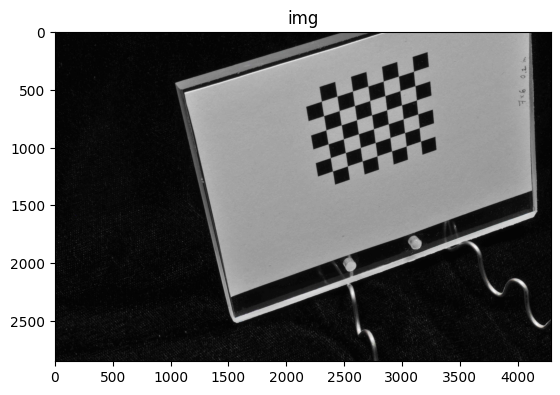

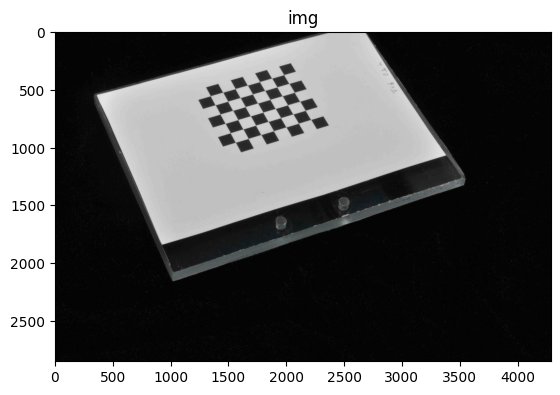

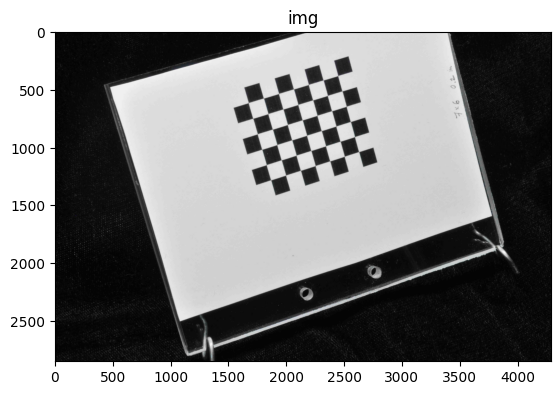

error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/calib3d/src/calibration.cpp:3752: error: (-215:Assertion failed) nimages > 0 in function 'calibrateCameraRO'


In [5]:
#!/usr/bin/env python
 
import cv2
import numpy as np
import os
import glob
 
# Defining the dimensions of checkerboard
CHECKERBOARD = (7,8)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = [] 
 
 
# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
 
# Extracting path of individual image stored in a given directory
images = glob.glob('Test_calibration_set/Images/Left/*.jpeg')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    # If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
     
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
         
        imgpoints.append(corners2)
 
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
     
    display_image('img',img)
    
h,w = img.shape[:2]
 
"""
Performing camera calibration by 
passing the value of known 3D points (objpoints)
and corresponding pixel coordinates of the 
detected corners (imgpoints)
"""
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
 
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

In [7]:
import cv2
import numpy as np

# Chessboard size (number of corners horizontally and vertically)
chessboard_size = (9, 6)
# Square size of each checkerboard corner in real world units (e.g., centimeters)
square_size = 1.5

# Termination criteria for checkerboard detection
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Arrays to store object points and image points from all the chessboard images
objpoints = []  # 3D points in real world space
imgpoints = []  # 2D points in image plane

# Capture images (replace 'chessboard*.jpg' with your image filenames)
images = [cv2.imread(f) for f in glob.glob('Test_calibration_set/Images/Left/*.jpeg')]
for gray in images:
    # Convert to grayscale
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    # If corners are found, refine corner locations for sub-pixel accuracy
    if ret:
        cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        # Get object points (like a plane on the chessboard)
        objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
        objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)
        objp *= square_size

        # Store object points and corresponding image corners
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(gray, chessboard_size, corners, ret)
        display_image('img', gray)
        
# Calibrate the camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Print camera calibration parameters
if ret:
    print("Camera matrix:")
    print(mtx)
    print("\nDistortion coefficients:")
    print(dist)
    print("\nRotation vectors:")
    for rvec in rvecs:
        print(rvec)
    print("\nTranslation vectors:")
    for tvec in tvecs:
        print(tvec)

    # You can save the calibration parameters to a file for later use
    # np.save('camera_calibration.npy', (mtx, dist, rvecs, tvecs))

else:
    print("Calibration failed")


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/calib3d/src/calibration.cpp:3752: error: (-215:Assertion failed) nimages > 0 in function 'calibrateCameraRO'


REFERENCES

- https://markhedleyjones.com/projects/calibration-checkerboard-collection
- https://learnopencv.com/camera-calibration-using-opencv/

